# Halo Mass Functions

## Initializations

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
# you need to install BigFile
from bigfile import BigFile
import glob,os,struct
# from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from scipy.interpolate import interp1d
from colossus.cosmology import cosmology

import seaborn as sns

sns.set()
sns.set_palette("Set2")
sns.set_style('ticks',{'ytick.direction':'in','xtick.direction':'in'})

cmap = plt.get_cmap("Set2")
sns.set_context("paper", font_scale=1.7,rc={"axes.linewidth": 1.3,"lines.linewidth": 2.5,"patch.linewidth": 2.2})
from matplotlib import rcParams as rc
import pickle
import warnings

import import_ipynb
import Tuples_Information as tuples_z2_z3

importing Jupyter notebook from Tuples Information.ipynb


In [2]:
snap_214 = 214
snap_348 = 348

pig_214 = BigFile('/hildafs/datasets/Asterix/PIG_files/PIG_%03d'%snap_214)
pig_348 = BigFile('/hildafs/datasets/Asterix/PIG2/PIG_%03d'%snap_348)

In [3]:
# some constants and unit conversions
msun_mks = 1.989e30
pc_mks = 3.086e16
grav_mks = 6.67e-11
km_mks = 1e3
yr_mks = 3.154e+7
c_mks = 3e8

Mpc_to_m = 3.086e+22
m_to_Mpc = 1./Mpc_to_m
s_to_year = 3.17098e-8
c_Mpc_yr = c_mks*m_to_Mpc/s_to_year

In [4]:
battr_214 = pig_214["Header"].attrs
scale_fac_214 = battr_214["Time"][0]
redshift_214 = 1./battr_214["Time"][0] - 1
Lbox_214 = battr_214['BoxSize']
hh_214 = battr_214['HubbleParam']
om0_214 = battr_214['Omega0']
omb_214 = battr_214['OmegaBaryon']
oml_214 = battr_214['OmegaLambda']
Nfof_214 = battr_214['NumFOFGroupsTotal']
sigma8 = 0.82

In [5]:
battr_348 = pig_348["Header"].attrs
scale_fac_348 = battr_348["Time"][0]
redshift_348 = 1./battr_348["Time"][0] - 1
Lbox_348 = battr_348['BoxSize']
hh_348 = battr_348['HubbleParam']
om0_348 = battr_348['Omega0']
omb_348 = battr_348['OmegaBaryon']
oml_348 = battr_348['OmegaLambda']
Nfof_348 = battr_348['NumFOFGroupsTotal']

In [6]:
def mass_func(m,Lbox,lim_min,lim_max,nbin,hh):
    bins = np.logspace(lim_min,lim_max,nbin)
    center = np.log10(bins)[:-1]+np.diff(np.log10(bins))/2
    count = np.histogram(m,bins)

    mask = count[0]>0
    fac = np.diff(np.log10(bins))*(Lbox/hh)**3
    yy = count[0]/fac
    err = yy[mask]/np.sqrt(count[0][mask])
    y1 = yy[mask]+err
    y2 = yy[mask]-err
    y2[y2<=0] = 1e-50
    return np.power(10,center[mask]),yy[mask], y1, y2

In [7]:
MassByType_214 = pig_214.open('FOFGroups/MassByType')[:5000000]*1e10/hh_214
MassByType_348 = pig_348.open('FOFGroups/MassByType')[:5000000]*1e10/hh_348

In [8]:
triples_z3_dr30, quadruples_z3_dr30 = tuples_z2_z3.triples_z3_dr30, tuples_z2_z3.quadruples_z3_dr30
triples_z3_dr200, quadruples_z3_dr200 = tuples_z2_z3.triples_z3_dr200, tuples_z2_z3.quadruples_z3_dr200

triples_z2_dr30, quadruples_z2_dr30 = tuples_z2_z3.triples_z2_dr30, tuples_z2_z3.quadruples_z2_dr30
triples_z2_dr200, quadruples_z2_dr200 = tuples_z2_z3.triples_z2_dr200, tuples_z2_z3.quadruples_z2_dr200

In [9]:
triples_info_z3_dr30, quadruples_info_z3_dr30 = tuples_z2_z3.trips_info_z3_dr30, tuples_z2_z3.quads_info_z3_dr30
triples_info_z3_dr200, quadruples_info_z3_dr200 = tuples_z2_z3.trips_info_z3_dr200, tuples_z2_z3.quads_info_z3_dr200

triples_info_z2_dr30, quadruples_info_z2_dr30 = tuples_z2_z3.trips_info_z2_dr30, tuples_z2_z3.quads_info_z2_dr30
triples_info_z2_dr200, quadruples_info_z2_dr200 = tuples_z2_z3.trips_info_z2_dr200, tuples_z2_z3.quads_info_z2_dr200

In [10]:
BHIDs_214 = pig_214.open('5/ID')[:]
BHIDs_348 = pig_348.open('5/ID')[:]

## Halo Mass Functions at z = 2.0, 3.0

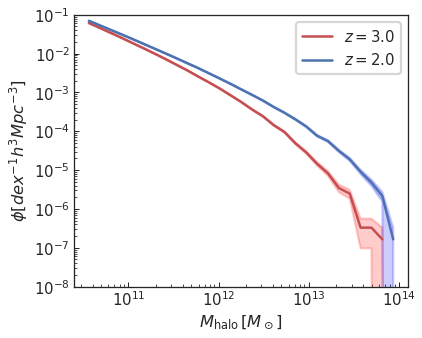

In [11]:
x1,y1,y_lower1,y_upper1 = mass_func(MassByType_214[:,1],Lbox=250,lim_min=10.5,lim_max=14,nbin=30,hh=hh_214)
x2,y2,y_lower2,y_upper2 = mass_func(MassByType_348[:,1],Lbox=250,lim_min=10.5,lim_max=14,nbin=30,hh=hh_348)

fig,ax = plt.subplots(figsize=(6,5),ncols=1,nrows=1)

ax.plot(x1,y1,c='r',label=r'$z=3.0$')
ax.fill_between(x1,y_lower1,y_upper1,color='red',alpha=0.2)
ax.plot(x2,y2,c='b',label=r'$z=2.0$')
ax.fill_between(x2,y_lower2,y_upper2,color='blue',alpha=0.2)

ax.set(xscale='log',yscale='log',ylim=[1e-8,0.1],\
       xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel=r'$\phi [dex^{-1} h^3 Mpc^{-3}]$')
ax.legend(loc='best')

plt.show()

## Removing Overlapping FOF Groups

In [12]:
z3_FOF_masses = []

encountered_214 = {}

for values in [triples_z3_dr30, quadruples_z3_dr30, triples_z3_dr200, quadruples_z3_dr200]:
    for tup in values:
        for id1 in tup[0:1]:
            idx1 = (BHIDs_214==id1).nonzero()[0][0]
            # print('Confirming BH index in the array:',idx1)

            # from now on we can read BH information only at these two indices:
            group1 = pig_214.open('5/GroupID')[idx1]
            gidx=group1-1
            
            if gidx in encountered_214:
                encountered_214[gidx] += 1
                break
            else:
                encountered_214[gidx] = 1

            FOFMass = pig_214.open('FOFGroups/MassByType')[gidx][1]*1e10/hh_214

            z3_FOF_masses.append(FOFMass)

In [13]:
z2_FOF_masses = []

encountered_348 = {}

for values in [triples_z2_dr30, quadruples_z2_dr30, triples_z2_dr200, quadruples_z2_dr200]:
    for tup in values:
        for id1 in tup[0:1]:
            idx1 = (BHIDs_348==id1).nonzero()[0][0]
            # print('Confirming BH index in the array:',idx1)

            # from now on we can read BH information only at these two indices:
            group1 = pig_348.open('5/GroupID')[idx1]
            gidx=group1-1
            
            if gidx in encountered_348:
                encountered_348[gidx] += 1
                break
            else:
                encountered_348[gidx] = 1

            FOFMass = pig_348.open('FOFGroups/MassByType')[gidx][1]*1e10/hh_348

            z2_FOF_masses.append(FOFMass)

## Finding Halos with Massive Satellites

I do not know what to do for this.

## Halo Mass Functions for Tuples at z = 2.0, 3.0

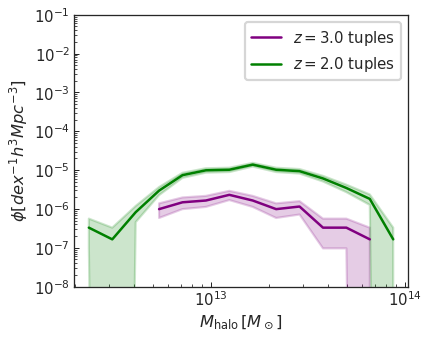

In [14]:
x3,y3,y_lower3,y_upper3 = mass_func(z3_FOF_masses,Lbox=250,lim_min=10.5,lim_max=14,nbin=30,hh=hh_214)
x4,y4,y_lower4,y_upper4 = mass_func(z2_FOF_masses,Lbox=250,lim_min=10.5,lim_max=14,nbin=30,hh=hh_348)

fig,ax = plt.subplots(figsize=(6,5),ncols=1,nrows=1)

ax.plot(x3,y3,c='purple',label=r'$z=3.0$ tuples')
ax.fill_between(x3,y_lower3,y_upper3,color='purple',alpha=0.2)
ax.plot(x4,y4,c='green',label=r'$z=2.0$ tuples')
ax.fill_between(x4,y_lower4,y_upper4,color='green',alpha=0.2)

ax.set(xscale='log',yscale='log',ylim=[1e-8,0.1],\
       xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel=r'$\phi [dex^{-1} h^3 Mpc^{-3}]$')
ax.legend(loc='best')

plt.show()

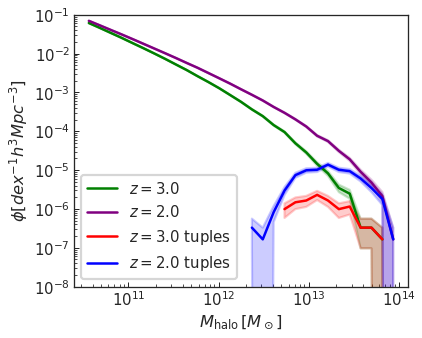

In [15]:
fig,ax = plt.subplots(figsize=(6,5),ncols=1,nrows=1)

ax.plot(x1,y1,c='green',label=r'$z=3.0$')
ax.fill_between(x1,y_lower1,y_upper1,color='green',alpha=0.2)
ax.plot(x2,y2,c='purple',label=r'$z=2.0$')
ax.fill_between(x2,y_lower2,y_upper2,color='purple',alpha=0.2)

ax.plot(x3,y3,c='red',label=r'$z=3.0$ tuples')
ax.fill_between(x3,y_lower3,y_upper3,color='red',alpha=0.2)
ax.plot(x4,y4,c='blue',label=r'$z=2.0$ tuples')
ax.fill_between(x4,y_lower4,y_upper4,color='blue',alpha=0.2)

ax.set(xscale='log',yscale='log',ylim=[1e-8,0.1],\
       xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel=r'$\phi [dex^{-1} h^3 Mpc^{-3}]$')
ax.legend(loc='best')

plt.savefig("HMFs",dpi=150,bbox_inches='tight')

plt.show()

## Ratio of Halo Mass Functions

In [16]:
y3int = np.interp(x1, x3, y3)
y4int = np.interp(x2, x4, y4)

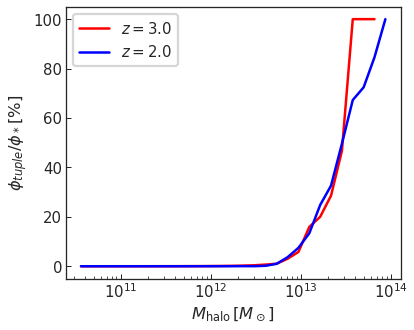

In [17]:
fig,ax = plt.subplots(figsize=(6,5),ncols=1,nrows=1)

ax.plot(x1,(y3int/y1)*100,c='red',label=r'$z=3.0$')
ax.plot(x2,(y4int/y2)*100,c='blue',label=r'$z=2.0$')

ax.set(xscale='log',xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel=r'$\phi_{tuple}/\phi_* [\%]$')
ax.legend(loc='best')

plt.savefig("HMFs_ratios",dpi=150,bbox_inches='tight')

plt.show()

## Overlapping Tuples in FOF Groups

In [18]:
overlapping_214 = {k:v for k,v in encountered_214.items() if v > 1}

print(overlapping_214)
print(len(overlapping_214))

{1: 6, 2: 4, 8: 7, 14: 4, 172: 4, 6: 5, 4: 2, 5: 2, 18: 4, 20: 3, 51: 2, 64: 2, 119: 4, 168: 2, 171: 2, 201: 2, 27: 9, 79: 2}
18


In [19]:
overlapping_348 = {k:v for k,v in encountered_348.items() if v > 1}

print(overlapping_348)
len(overlapping_348)

{1: 18, 8: 25, 26: 6, 38: 8, 51: 13, 64: 9, 78: 4, 89: 4, 115: 5, 116: 4, 160: 4, 162: 3, 194: 4, 210: 2, 228: 4, 239: 2, 429: 4, 502: 4, 679: 4, 753: 4, 816: 4, 835: 4, 4: 121, 9: 3, 12: 5, 20: 5, 23: 6, 24: 23, 31: 5, 63: 5, 77: 9, 105: 11, 5: 3, 13: 2, 15: 2, 27: 2, 28: 2, 30: 7, 36: 2, 37: 4, 43: 2, 52: 2, 53: 2, 60: 3, 61: 4, 62: 7, 66: 2, 68: 2, 74: 2, 76: 2, 80: 4, 82: 3, 100: 4, 126: 3, 137: 4, 146: 2, 150: 2, 151: 2, 152: 3, 155: 4, 163: 2, 172: 2, 173: 4, 204: 2, 207: 2, 211: 4, 223: 2, 224: 2, 226: 2, 263: 4, 267: 2, 282: 3, 291: 2, 298: 2, 307: 2, 313: 4, 331: 2, 344: 2, 352: 2, 373: 3, 386: 2, 389: 2, 394: 2, 399: 2, 410: 3, 424: 2, 432: 2, 433: 2, 436: 2, 450: 2, 477: 2, 529: 2, 546: 2, 557: 2, 560: 2, 563: 2, 587: 2, 655: 2, 674: 2, 680: 2, 707: 2, 708: 2, 712: 2, 724: 2, 754: 2, 766: 2, 789: 2, 813: 2, 839: 2, 928: 2, 1014: 2, 1024: 2, 1235: 2, 1238: 2, 1354: 2, 1465: 2, 1535: 2, 1728: 2, 1845: 2, 1851: 2, 1940: 2, 2312: 2, 3243: 2, 0: 18, 3: 3, 7: 6, 14: 104, 17: 35, 1

161

In [20]:
all_z2_FOF_masses = []

for values in [triples_z2_dr30, quadruples_z2_dr30, triples_z2_dr200, quadruples_z2_dr200]:
    for tup in values:
        for id1 in tup[0:1]:
            idx1 = (BHIDs_348==id1).nonzero()[0][0]
            # print('Confirming BH index in the array:',idx1)

            # from now on we can read BH information only at these two indices:
            group1 = pig_348.open('5/GroupID')[idx1]
            gidx=group1-1

            FOFMass = pig_348.open('FOFGroups/MassByType')[gidx][1]*1e10/hh_348

            all_z2_FOF_masses.append(FOFMass[0])

In [21]:
all_z3_FOF_masses = []

for values in [triples_z3_dr30, quadruples_z3_dr30, triples_z3_dr200, quadruples_z3_dr200]:
    for tup in values:
        for id1 in tup[0:1]:
            idx1 = (BHIDs_214==id1).nonzero()[0][0]
            # print('Confirming BH index in the array:',idx1)

            # from now on we can read BH information only at these two indices:
            group1 = pig_214.open('5/GroupID')[idx1]
            gidx=group1-1

            FOFMass = pig_214.open('FOFGroups/MassByType')[gidx][1]*1e10/hh_214

            all_z3_FOF_masses.append(FOFMass[0])

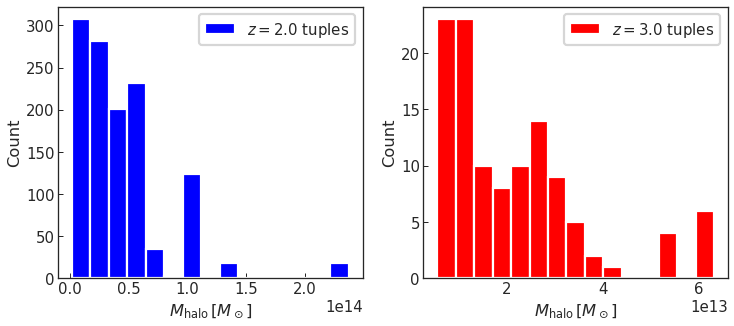

In [22]:
fig,(ax1,ax2) = plt.subplots(figsize=(12,5),ncols=2,nrows=1)

ax1.hist(all_z2_FOF_masses,color='blue',bins=15,label=r'$z=2.0\ {\rm tuples}$')
ax2.hist(all_z3_FOF_masses,color='red',bins=15,label=r'$z=3.0\ {\rm tuples}$')

ax1.set(xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel='Count')
ax2.set(xlabel=r'$M_{\rm halo}\,[M_\odot]$',ylabel='Count')

ax1.legend(loc="best")
ax2.legend(loc="best")

plt.savefig("HMF_histograms",dpi=150,bbox_inches='tight')

plt.show()